In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os

In [26]:
plt.style.use(['science'])
plt.rcParams.update({'figure.dpi': '200'})

In [27]:
def myplot(title, path, labels, xlabel='Epoch', ylabel='None', xlims=None, ylims=None):
    plt.figure()
    paths = os.listdir(path)
    paths = sorted(paths)
    print(paths)
    paths = [os.path.join(path, p) for p in paths]

    for path in paths:
        data = pd.read_csv(path)
        steps = len(data)
        plt.plot(range(steps), data['Value'], label=labels.pop(0))

    if ylims is not None:
        plt.ylim(ylims)
    if xlims is not None:
        plt.xlim(xlims)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

['run-big_w-tag-eval_macro avg_f1-score.csv', 'run-no_w-tag-eval_macro avg_f1-score.csv', 'run-normal_w-tag-eval_macro avg_f1-score.csv', 'run-w-tag-eval_macro avg_f1-score.csv']


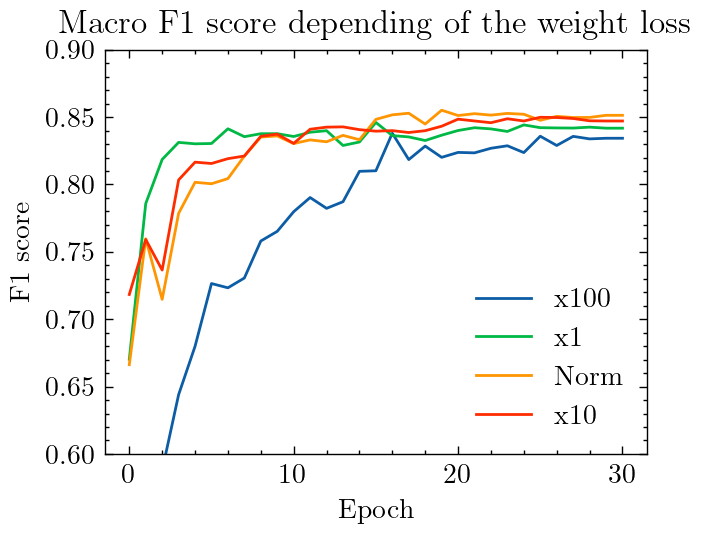

In [28]:
myplot('Macro F1 score depending of the weight loss','output_data/main_model_f1', ['x100', 'x1', 'Norm', 'x10'], ylabel='F1 score', ylims=[0.6, 0.9])

['run-big_w-tag-eval_0_recall.csv', 'run-no_w-tag-eval_0_recall.csv', 'run-normal_w-tag-eval_0_recall.csv', 'run-w-tag-eval_0_recall.csv']


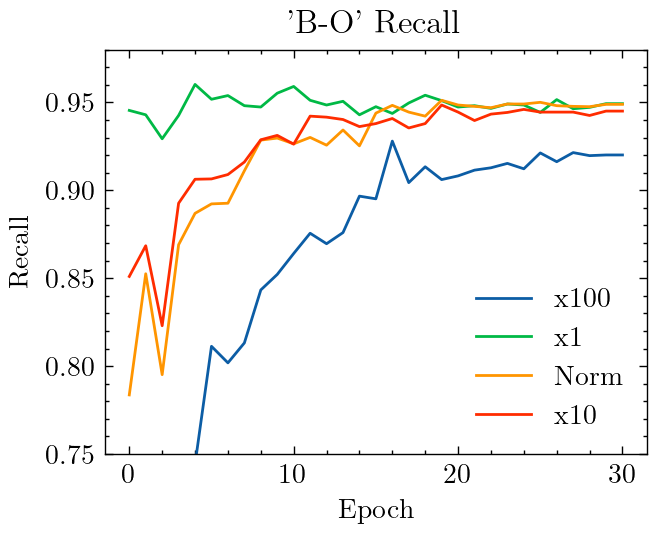

In [29]:
myplot('\'B-O\' Recall','output_data/main_model_0_recall', ['x100', 'x1', 'Norm', 'x10'], ylabel='Recall', ylims=[0.75, 0.98])

['run-big_w-tag-eval_1_recall.csv', 'run-no_w-tag-eval_1_recall.csv', 'run-normal_w-tag-eval_1_recall.csv', 'run-w-tag-eval_1_recall.csv']


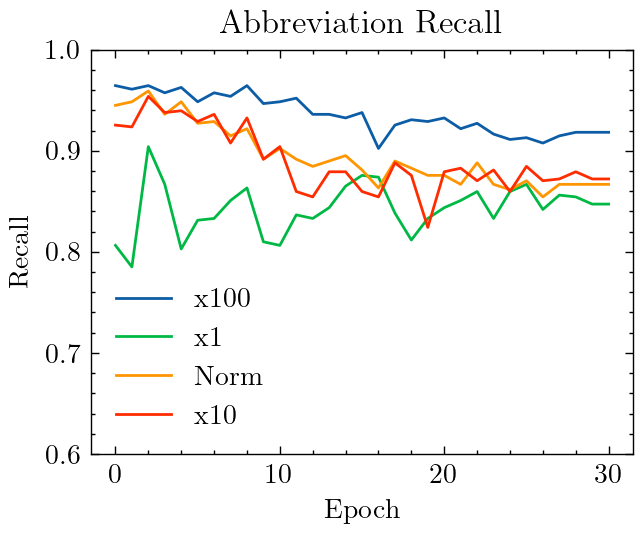

In [30]:
myplot('Abbreviation Recall','output_data/main_model_1_recall', ['x100', 'x1', 'Norm', 'x10'], ylabel='Recall', ylims=[0.6, 1])